In [510]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [511]:
df = pd.read_csv(r"C:\Users\omkar\AI\Diabetes-Detection\Diabetes Prediction\diabetes_dataset.csv")
df.head()

,Unnamed: 0,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,...,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,0,58,Female,White,35.8,83.4,123.9,10.9,152.0,114,...,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,1,48,Male,Asian,24.1,71.4,183.7,12.8,103.0,91,...,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,2,34,Female,Black,25.0,113.8,142.0,14.5,179.0,104,...,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,3,62,Male,Asian,32.7,100.4,167.4,8.8,176.0,118,...,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,4,27,Female,Asian,33.5,110.8,146.4,7.1,122.0,97,...,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [512]:
df.shape

(10000, 21)

In [513]:
df.drop(["Unnamed: 0"],axis="columns",inplace=True)

In [514]:
df.head()

,Age,Sex,Ethnicity,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,GGT,Serum_Urate,Physical_Activity_Level,Dietary_Intake_Calories,Alcohol_Consumption,Smoking_Status,Family_History_of_Diabetes,Previous_Gestational_Diabetes
0,58,Female,White,35.8,83.4,123.9,10.9,152.0,114,197.8,50.2,99.2,37.5,7.2,Moderate,1538,Moderate,Never,0,1
1,48,Male,Asian,24.1,71.4,183.7,12.8,103.0,91,261.6,62.0,146.4,88.5,6.1,Moderate,2653,Moderate,Current,0,1
2,34,Female,Black,25.0,113.8,142.0,14.5,179.0,104,261.0,32.1,164.1,56.2,6.9,Low,1684,Heavy,Former,1,0
3,62,Male,Asian,32.7,100.4,167.4,8.8,176.0,118,183.4,41.1,84.0,34.4,5.4,Low,3796,Moderate,Never,1,0
4,27,Female,Asian,33.5,110.8,146.4,7.1,122.0,97,203.2,53.9,92.8,81.9,7.4,Moderate,3161,Heavy,Current,0,0


In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            9999 non-null   float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        9999 non-null   float64
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                9999 non-null   float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            9999 non-null   

In [516]:
df.isnull().sum()

Age                                 0
Sex                                 0
Ethnicity                           0
BMI                                 1
Waist_Circumference                 0
Fasting_Blood_Glucose               0
HbA1c                               0
Blood_Pressure_Systolic             1
Blood_Pressure_Diastolic            0
Cholesterol_Total                   0
Cholesterol_HDL                     1
Cholesterol_LDL                     0
GGT                                 1
Serum_Urate                         0
Physical_Activity_Level             0
Dietary_Intake_Calories             0
Alcohol_Consumption              3320
Smoking_Status                      0
Family_History_of_Diabetes          0
Previous_Gestational_Diabetes       0
dtype: int64

In [517]:
df.duplicated().sum()

0

In [518]:
print(df['Alcohol_Consumption'].unique())
print(df['Sex'].unique())
print(df['Ethnicity'].unique())
print(df['Physical_Activity_Level'].unique())
print(df['Smoking_Status'].unique())

['Moderate' 'Heavy' nan]
['Female' 'Male']
['White' 'Asian' 'Black' 'Hispanic']
['Moderate' 'Low' 'High']
['Never' 'Current' 'Former']


In [519]:
df['Alcohol_Consumption'].fillna(df['Alcohol_Consumption'].mode()[0], inplace=True)
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Blood_Pressure_Systolic'].fillna(df['Blood_Pressure_Systolic'].mean(), inplace=True)
df['GGT'].fillna(df['GGT'].mean(), inplace=True)
df['Cholesterol_HDL'].fillna(df['Cholesterol_HDL'].mean(), inplace=True)

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Sex                            10000 non-null  object 
 2   Ethnicity                      10000 non-null  object 
 3   BMI                            10000 non-null  float64
 4   Waist_Circumference            10000 non-null  float64
 5   Fasting_Blood_Glucose          10000 non-null  float64
 6   HbA1c                          10000 non-null  float64
 7   Blood_Pressure_Systolic        10000 non-null  float64
 8   Blood_Pressure_Diastolic       10000 non-null  int64  
 9   Cholesterol_Total              10000 non-null  float64
 10  Cholesterol_HDL                10000 non-null  float64
 11  Cholesterol_LDL                10000 non-null  float64
 12  GGT                            10000 non-null  

In [521]:
if 'Fasting_Blood_Glucose' in df.columns:
    df['Diabetes'] = df['Fasting_Blood_Glucose'].apply(lambda x: 1 if x > 125 else 0)
    print('Target column Diabetes created based on Fasting_Blood_Glucose.')
else:
    print('Fasting_Blood_Glucose column not found. Please check the dataset.')

Target column Diabetes created based on Fasting_Blood_Glucose.


In [522]:
df_numeric = df.select_dtypes(include=['int64','float64'])
df_categorical = df.select_dtypes(include=['object'])

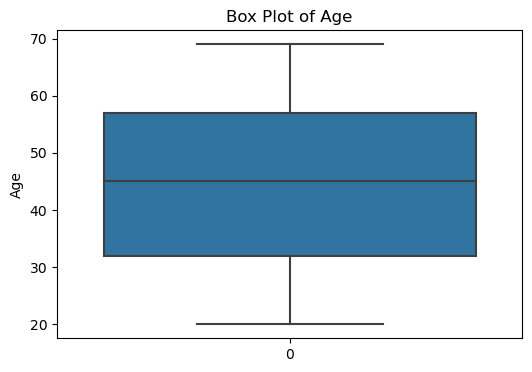

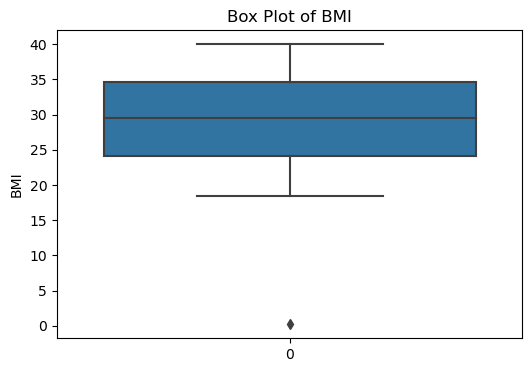

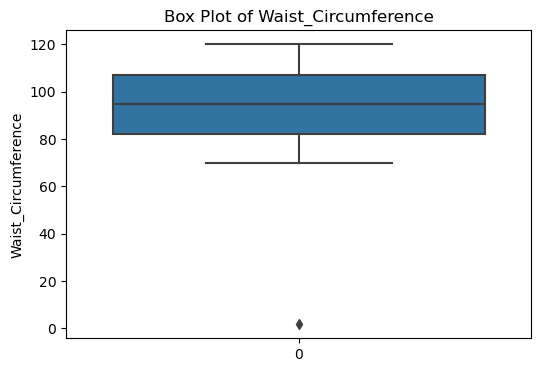

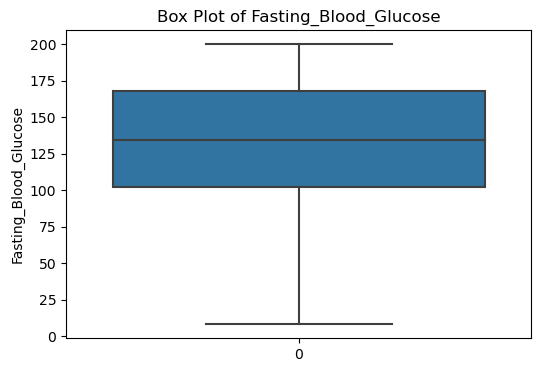

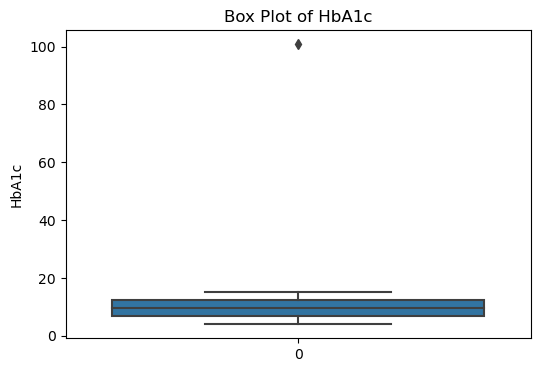

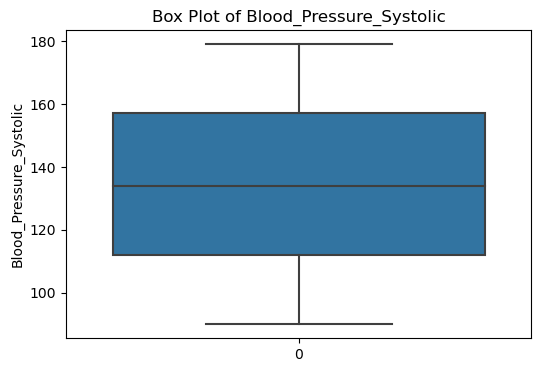

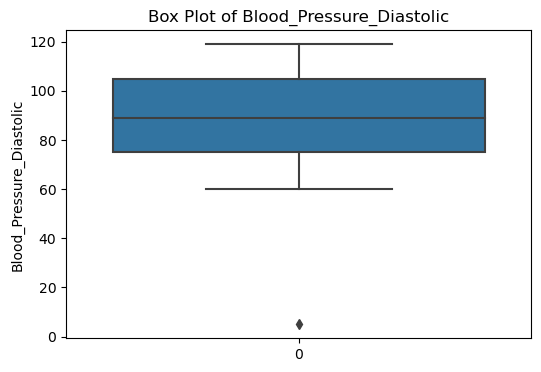

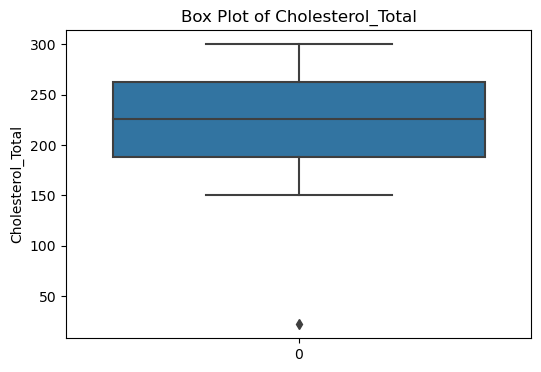

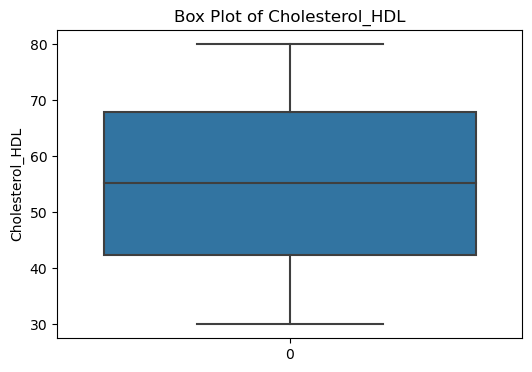

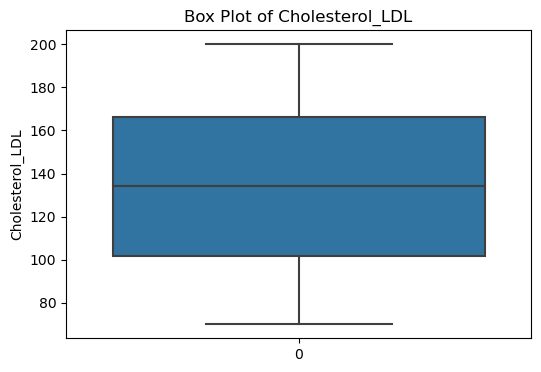

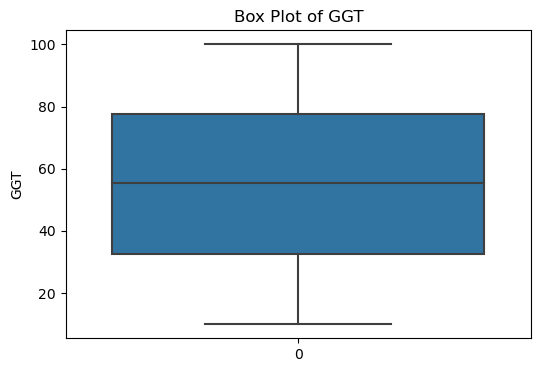

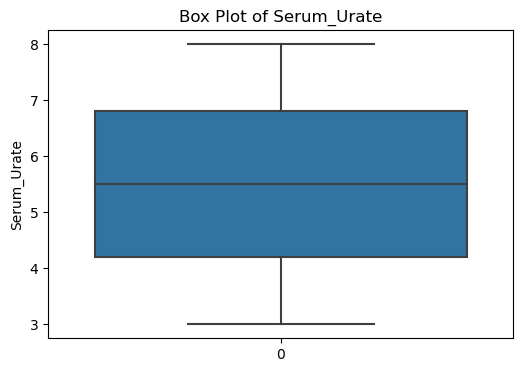

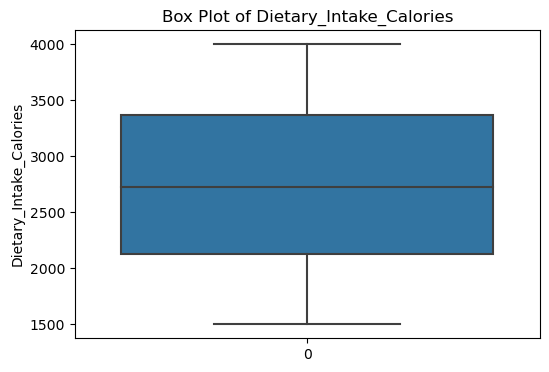

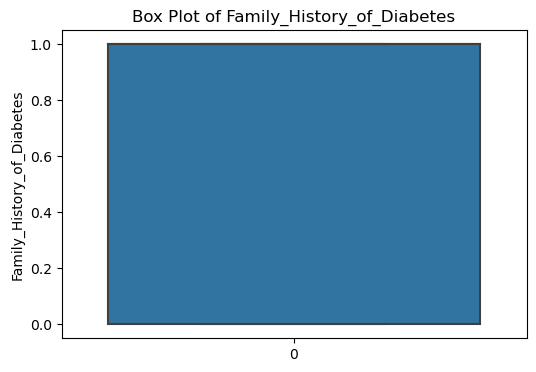

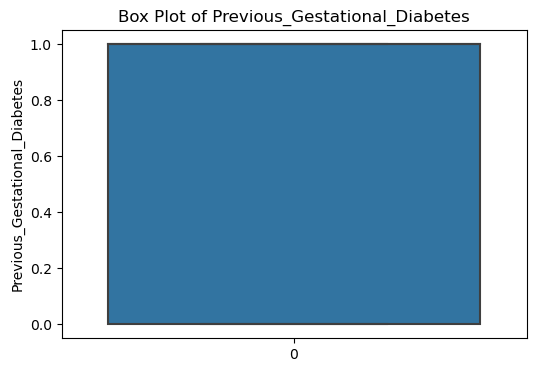

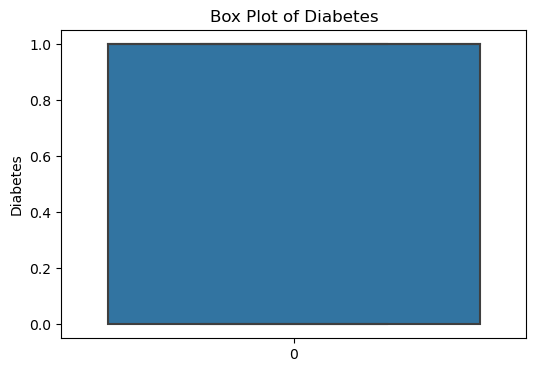

In [523]:
for col in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df_numeric[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

In [524]:
for column in df_numeric:
    Q1 = df_numeric[column].quantile(0.25)
    Q3 = df_numeric[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_numeric[column] = np.where(df_numeric[column] < lower_bound, lower_bound, df_numeric[column])
    df_numeric[column] = np.where(df_numeric[column] > upper_bound, upper_bound, df_numeric[column])

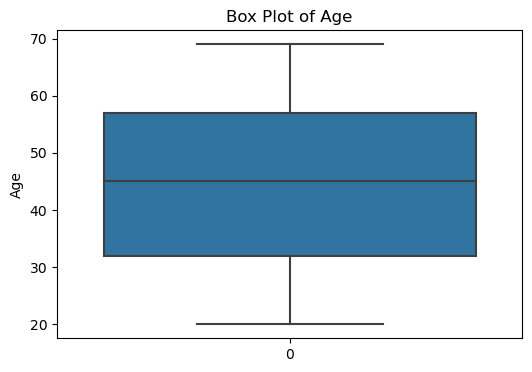

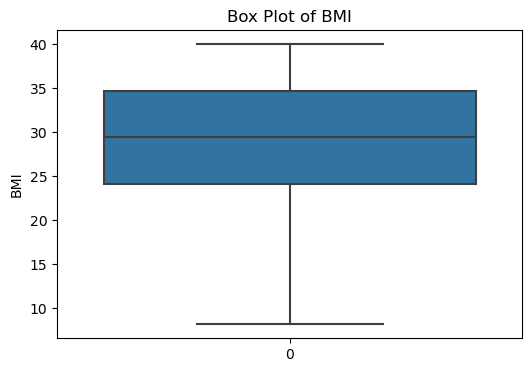

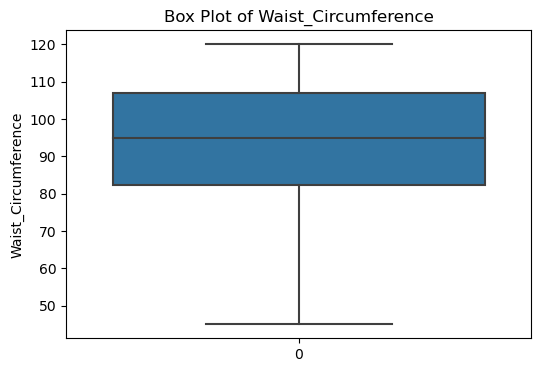

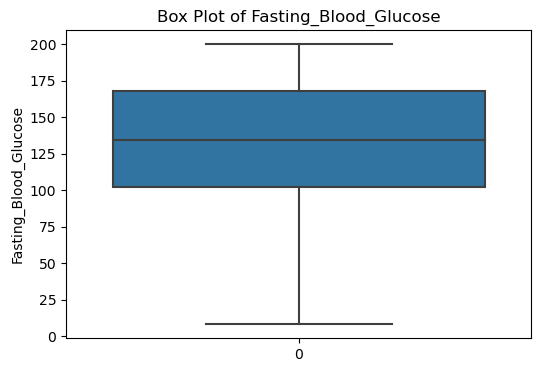

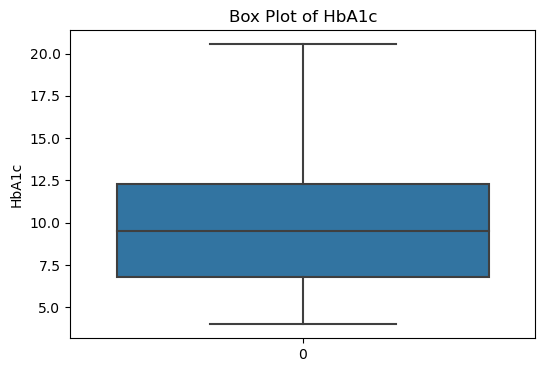

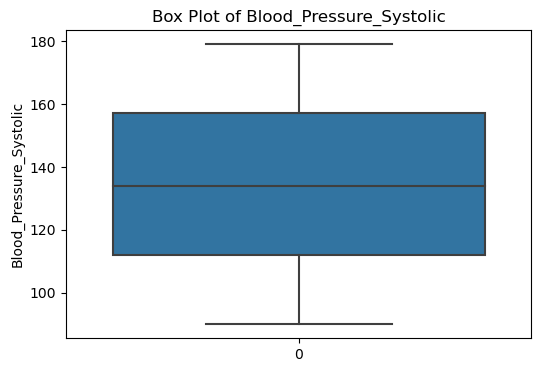

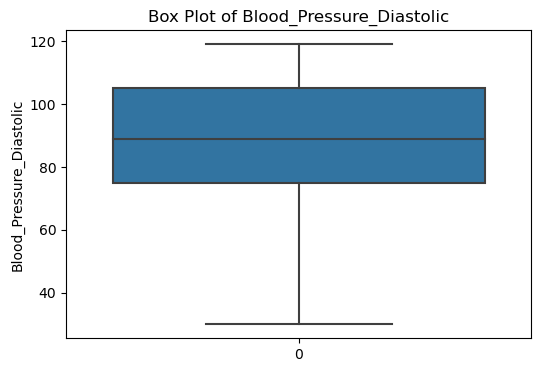

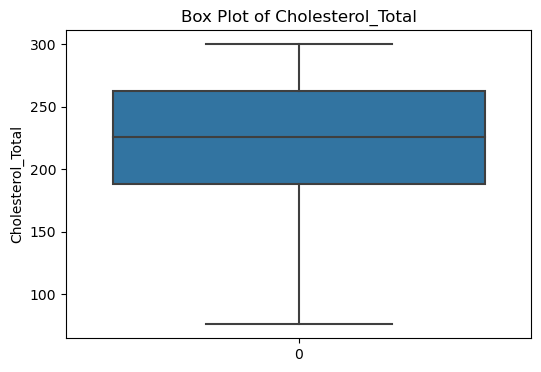

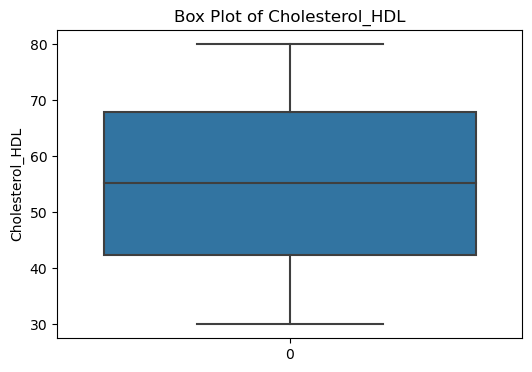

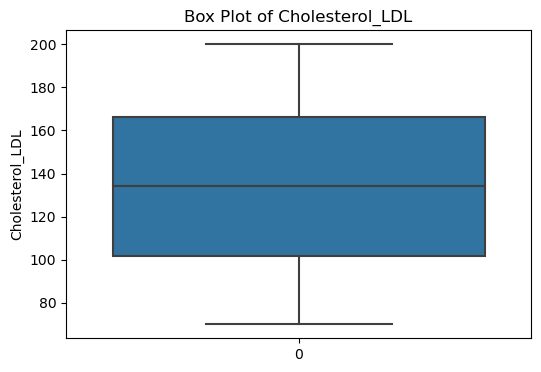

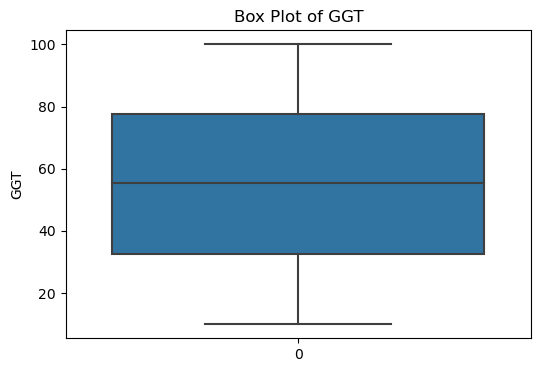

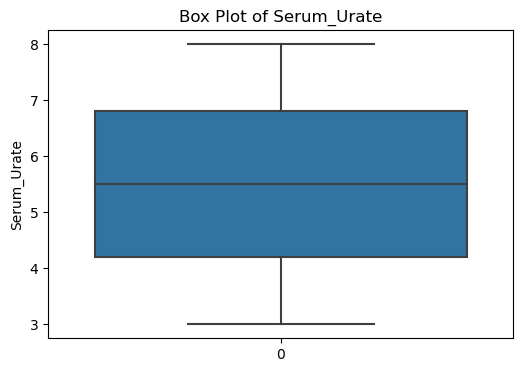

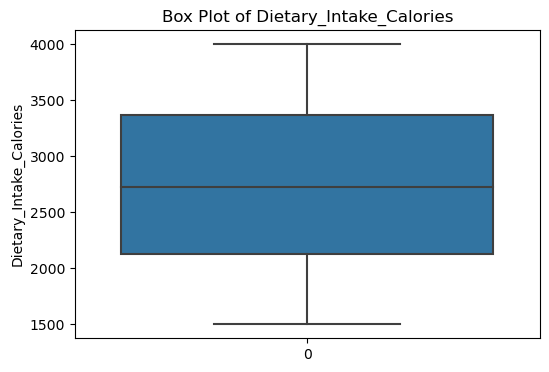

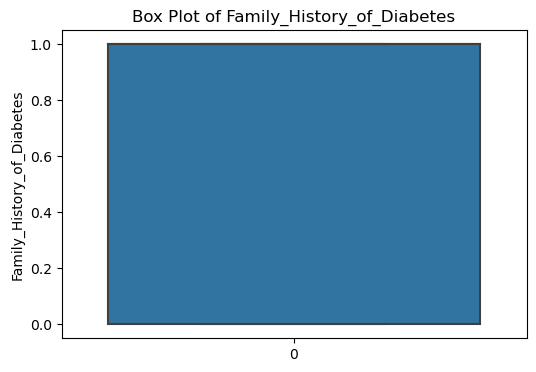

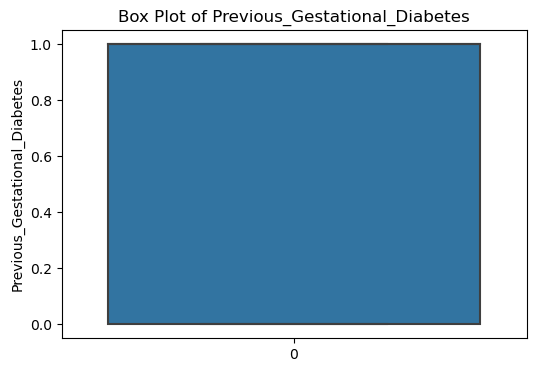

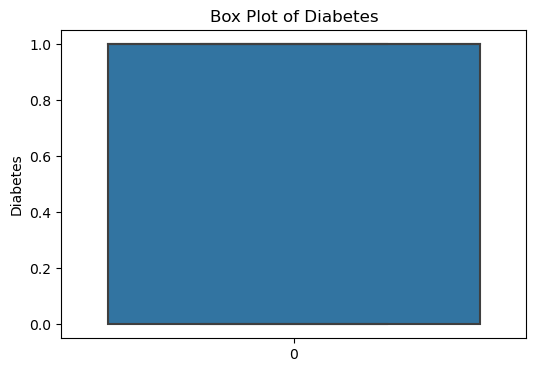

In [525]:
for col in df_numeric.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df_numeric[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.show()

<Axes: >

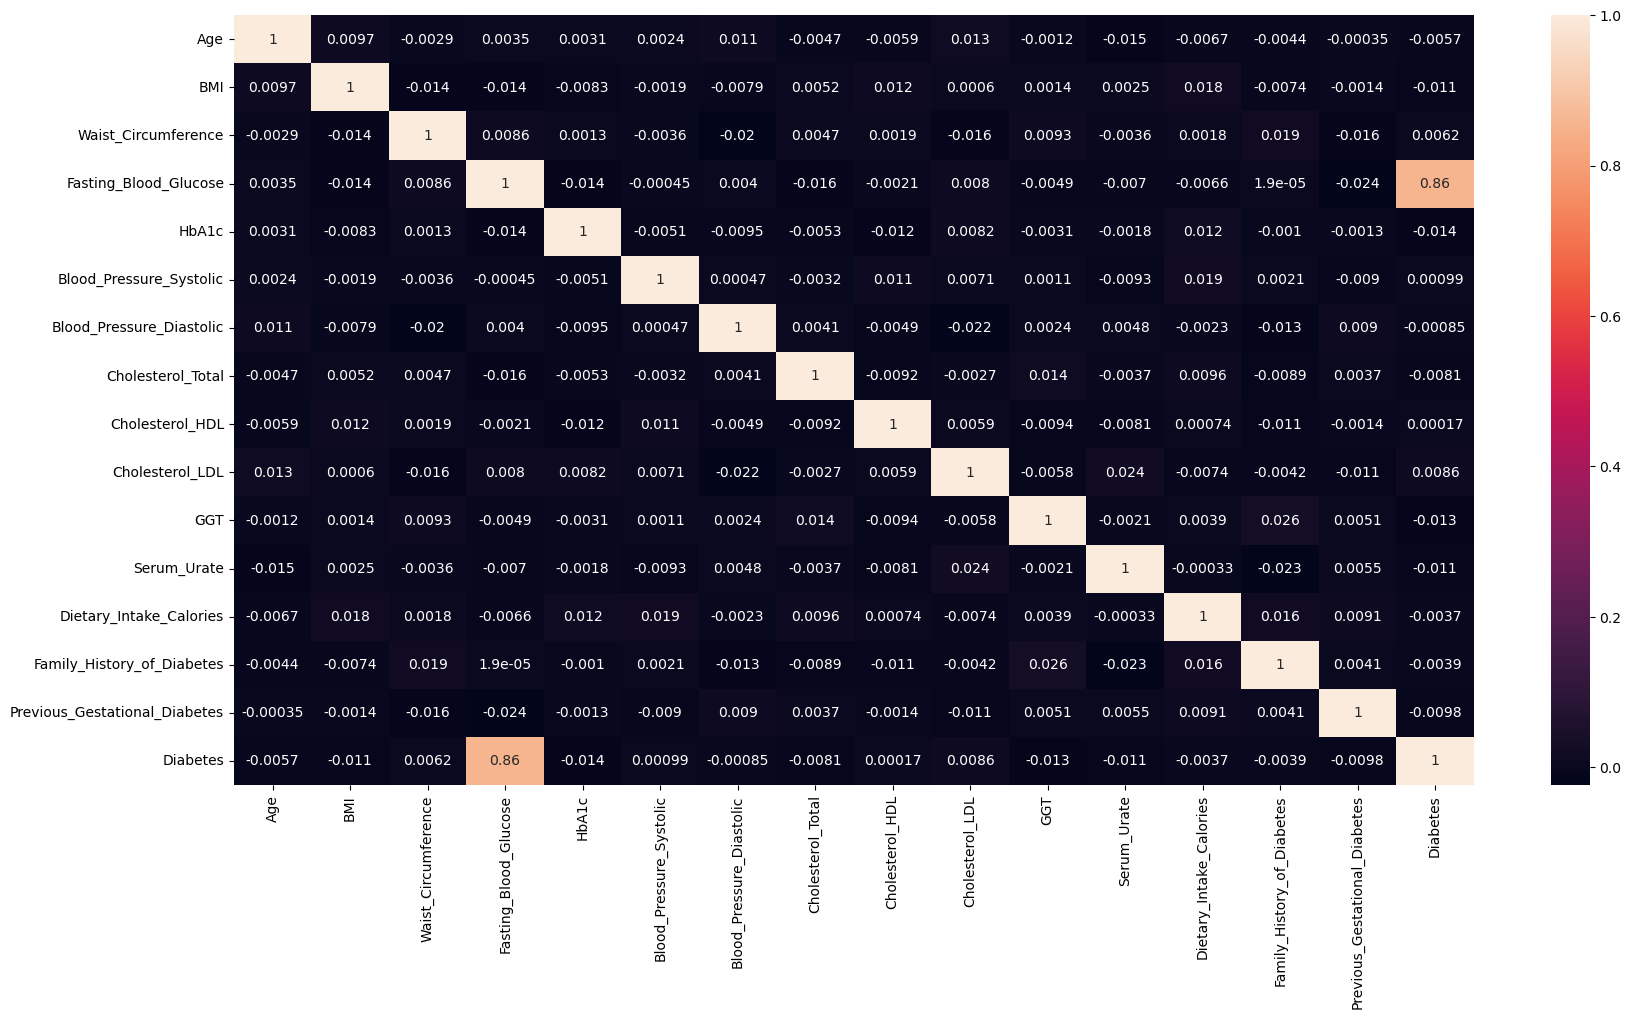

In [526]:
plt.figure(figsize=(20,10))
sns.heatmap(df_numeric.corr(),annot=True)

In [527]:
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

In [528]:
df_categorical = pd.get_dummies(df_categorical,drop_first=True).astype(int)

In [529]:
df_categorical.head()

,Sex_Male,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Alcohol_Consumption_Moderate,Smoking_Status_Former,Smoking_Status_Never
0,0,0,0,1,0,1,1,0,1
1,1,0,0,0,0,1,1,0,0
2,0,1,0,0,1,0,0,1,0
3,1,0,0,0,1,0,1,0,1
4,0,0,0,0,0,1,0,0,0


In [530]:
df = pd.concat([df_numeric, df_categorical], axis=1)

In [531]:
df.head()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,...,Diabetes,Sex_Male,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Alcohol_Consumption_Moderate,Smoking_Status_Former,Smoking_Status_Never
0,58.0,35.8,83.4,123.9,10.9,152.0,114.0,197.8,50.2,99.2,...,0.0,0,0,0,1,0,1,1,0,1
1,48.0,24.1,71.4,183.7,12.8,103.0,91.0,261.6,62.0,146.4,...,1.0,1,0,0,0,0,1,1,0,0
2,34.0,25.0,113.8,142.0,14.5,179.0,104.0,261.0,32.1,164.1,...,1.0,0,1,0,0,1,0,0,1,0
3,62.0,32.7,100.4,167.4,8.8,176.0,118.0,183.4,41.1,84.0,...,1.0,1,0,0,0,1,0,1,0,1
4,27.0,33.5,110.8,146.4,7.1,122.0,97.0,203.2,53.9,92.8,...,1.0,0,0,0,0,0,1,0,0,0


In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               10000 non-null  float64
 1   BMI                               10000 non-null  float64
 2   Waist_Circumference               10000 non-null  float64
 3   Fasting_Blood_Glucose             10000 non-null  float64
 4   HbA1c                             10000 non-null  float64
 5   Blood_Pressure_Systolic           10000 non-null  float64
 6   Blood_Pressure_Diastolic          10000 non-null  float64
 7   Cholesterol_Total                 10000 non-null  float64
 8   Cholesterol_HDL                   10000 non-null  float64
 9   Cholesterol_LDL                   10000 non-null  float64
 10  GGT                               10000 non-null  float64
 11  Serum_Urate                       10000 non-null  float64
 12  Dieta

In [533]:
df.head()

,Age,BMI,Waist_Circumference,Fasting_Blood_Glucose,HbA1c,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Cholesterol_Total,Cholesterol_HDL,Cholesterol_LDL,...,Diabetes,Sex_Male,Ethnicity_Black,Ethnicity_Hispanic,Ethnicity_White,Physical_Activity_Level_Low,Physical_Activity_Level_Moderate,Alcohol_Consumption_Moderate,Smoking_Status_Former,Smoking_Status_Never
0,58.0,35.8,83.4,123.9,10.9,152.0,114.0,197.8,50.2,99.2,...,0.0,0,0,0,1,0,1,1,0,1
1,48.0,24.1,71.4,183.7,12.8,103.0,91.0,261.6,62.0,146.4,...,1.0,1,0,0,0,0,1,1,0,0
2,34.0,25.0,113.8,142.0,14.5,179.0,104.0,261.0,32.1,164.1,...,1.0,0,1,0,0,1,0,0,1,0
3,62.0,32.7,100.4,167.4,8.8,176.0,118.0,183.4,41.1,84.0,...,1.0,1,0,0,0,1,0,1,0,1
4,27.0,33.5,110.8,146.4,7.1,122.0,97.0,203.2,53.9,92.8,...,1.0,0,0,0,0,0,1,0,0,0


In [534]:
X = df.drop("Diabetes",axis="columns")
y = df['Diabetes']

In [535]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)

In [536]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

C:\Users\omkar\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [537]:
print("Testing Accuracy:- ",accuracy_score(y_test,y_pred))
print("Training Accuracy:- ",accuracy_score(y_train,y_train_pred))

Testing Accuracy:-  0.948
Training Accuracy:-  0.95


In [538]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)
y_train_pred = dtc.predict(X_train)

In [539]:
print("Testing Accuracy:- ",accuracy_score(y_test,y_pred))
print("Training Accuracy:- ",accuracy_score(y_train,y_train_pred))

Testing Accuracy:-  1.0
Training Accuracy:-  1.0


In [540]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
y_train_pred = rfc.predict(X_train)

In [541]:
print("Testing Accuracy:- ",accuracy_score(y_test,y_pred))
print("Training Accuracy:- ",accuracy_score(y_train,y_train_pred))

Testing Accuracy:-  1.0
Training Accuracy:-  1.0


In [542]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1270
         1.0       1.00      1.00      1.00      1730

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

